# AMAZON SALES ANALYSIS

1.Data cleaning and and preprocessing
    *Remove duplicates and transform the data to useable information
2.EDA(Exploratary Data Analysis)
    *Discriptive statistics and data visualization trends,seasonality and patterns in sales
3.Sales perfomance analysis:
    *Calculate and analyze KPI(Key perfomance indicators) such as total revenue,average order value(AOV),Conversion rate,Customer acquibtion cost(CAC) and customer life time value(CLV)
    *Segmentation about segment customers based on demographics,purchase behaviour or geography
4.Recommendations and actionable insights:
    *Summarize findings and insights from the analysis and provide actionable reccomendations based on insights
5.Visualization and reporting:
    *Creating interactive dashboards add into generate regular reports summarizzing sales perfomance

 # Data cleaning and data preprocessing

In [3]:
#Load "numpy" and "pandas" for manipulating numbers and dataframes
#Load "matplotlib.pyplot" and "seaborn" for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load data to read csv file
amazon = pd.read_csv("C:/Users/navan/Downloads/Amazon Sales data.csv",parse_dates=["Order Date","Ship Date"],dayfirst=True)

C:\Users\navan\AppData\Local\Temp\ipykernel_20176\708647047.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  amazon = pd.read_csv("C:/Users/navan/Downloads/Amazon Sales data.csv",parse_dates=["Order Date","Ship Date"],dayfirst=True)
C:\Users\navan\AppData\Local\Temp\ipykernel_20176\708647047.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  amazon = pd.read_csv("C:/Users/navan/Downloads/Amazon Sales data.csv",parse_dates=["Order Date","Ship Date"],dayfirst=True)


In [5]:
#Breif look of the data
amazon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
#Shape of the dataset
amazon.shape

(100, 14)

In [11]:
#Get row names of the column
amazon.index

RangeIndex(start=0, stop=100, step=1)

In [39]:
#Checking the data have null value are not
amazon.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
month             0
dtype: int64

In [15]:
#Get a column names of the data
amazon.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [17]:
#Get a basic information about the dataset
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


Observation:
    *In this dataset have 100 rows and 14 columns 

In [5]:
amazon['Order Date']=amazon['Order Date'].dt.strftime('%d/%m/%Y') #Changing the Date format 

In [7]:
amazon['Ship Date']=amazon['Ship Date'].dt.strftime('%d/%m/%Y') #Changing the date format

In [9]:
amazon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,28/05/2010,669165933,27/06/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,22/08/2012,963881480,15/09/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,02/05/2014,341417157,08/05/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,20/06/2014,514321792,05/07/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01/02/2013,115456712,06/02/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [11]:
amazon.sort_values(by='Order Date',inplace=True) #Assigning the data in date wise

In [13]:
amazon.reset_index(drop=True,inplace=True)#Re-assigning the index values

In [15]:
amazon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,01/02/2013,115456712,06/02/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
1,Asia,Brunei,Office Supplies,Online,L,01/04/2012,320009267,08/05/2012,6708,651.21,524.96,4368316.68,3521431.68,846885.00
2,Sub-Saharan Africa,Cameroon,Beverages,Offline,C,01/04/2015,519820964,18/04/2015,5430,47.45,31.79,257653.50,172619.70,85033.80
3,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,01/06/2016,728815257,29/06/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
4,Europe,Albania,Clothes,Online,C,02/02/2010,385383069,18/03/2010,2269,109.28,35.84,247956.32,81320.96,166635.36


In [128]:
#Calculate how many years based data in this data?
len(amazon['Order Date'].dt.year.value_counts())

8

In [17]:
#Extract the condinents in this dataset
amazon['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Asia                                 11
Australia and Oceania                11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [144]:
#Extract the product items in the dataset
amazon['Item Type'].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

# CENTRAL TENDENCY OF THE DATASET

In [19]:
# Calculate statistics values in this dataset
amazon.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [21]:
#amazon dataset for 'Units Sold' to calculate mean value
amazon['Units Sold'].mean()

5128.71

In [23]:
#amazon dataset for 'Units Sold' to calculate median value
amazon['Units Sold'].median()

5382.5

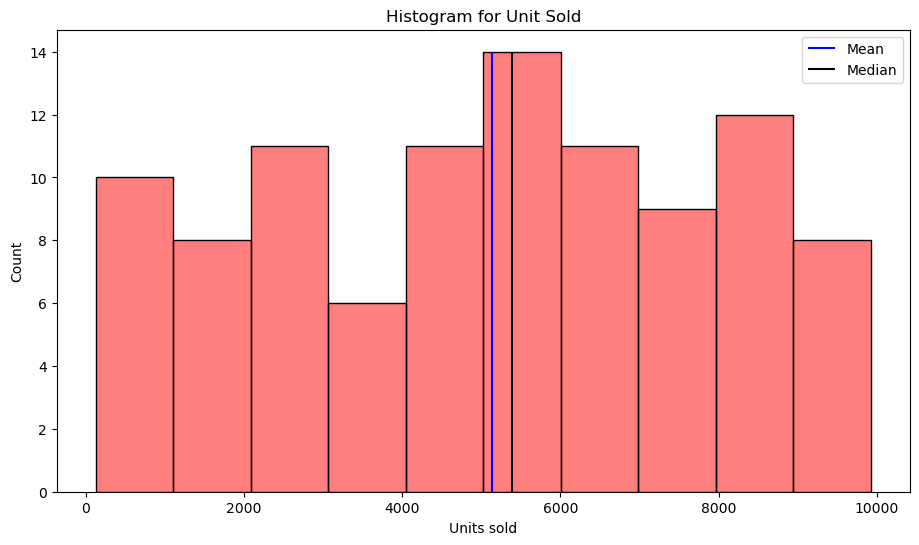

In [13]:
#Histogram for 'Unit Sold' add into mean and median feature
plt.figure(figsize = (11,6))

sns.histplot(data = amazon,x='Units Sold',color='red',edgecolor='black',alpha=0.5,bins=10)
plt.title("Histogram for Unit Sold")
plt.xlabel("Units sold")
plt.ylabel("Count")
plt.vlines(amazon['Units Sold'].mean(),ymin=0,ymax=14,color='blue',label='Mean')
plt.vlines(amazon['Units Sold'].median(),ymin=0,ymax=14,color='black',label='Median')
plt.legend()
plt.show()

C:\Users\navan\AppData\Local\Temp\ipykernel_17624\1830479407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Units Sold'],color='red')


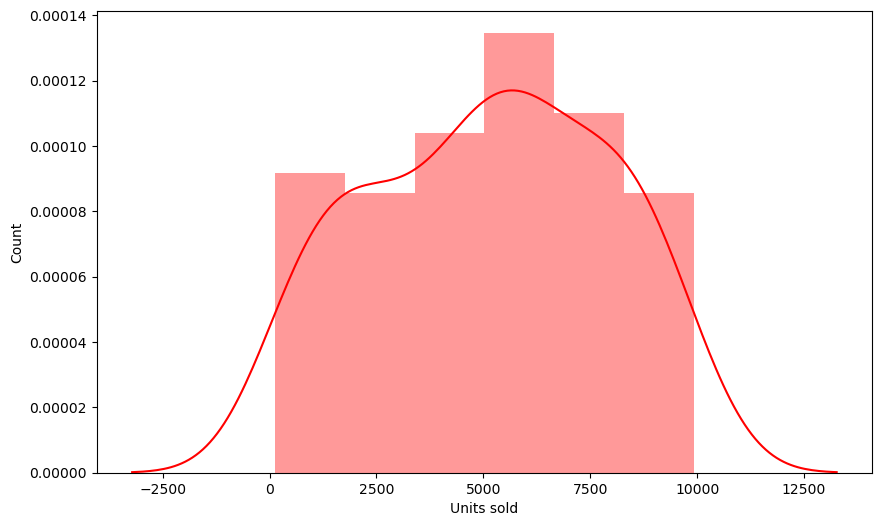

In [17]:
#Distplot using "Units Sold" feature
plt.figure(figsize = (10,6))

sns.distplot(amazon['Units Sold'],color='red')
plt.xlabel('Units sold')
plt.ylabel('Count')
plt.show()

In [19]:
#Skewness of "Units Sold"
amazon['Units Sold'].skew()

-0.0999527123530475

Observation:
*In this observation of plot the data is not well distributed.the median value is greater than median value so, the data was negatively skewed and check the data is not symmetric

In [21]:
#Calculate the mean for 'Total Revenue'
amazon['Total Revenue'].mean()

1373487.6831

In [23]:
#Calculate the median for 'Total Revenue'
amazon['Total Revenue'].median()

752314.36

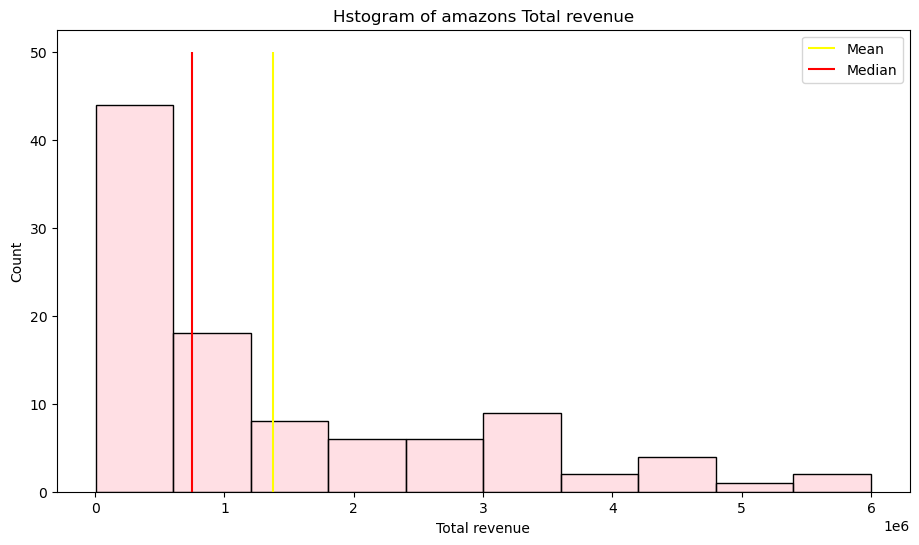

In [33]:
#Create a histogram for "Total Revenue" feature and also include mean , median
plt.figure(figsize = (11,6))

sns.histplot(data = amazon,x='Total Revenue',color = 'pink',edgecolor = 'black',alpha = 0.5,bins = 10)
plt.title('Hstogram of amazons Total revenue')
plt.xlabel('Total revenue')
plt.ylabel('Count')
plt.vlines(amazon['Total Revenue'].mean(),ymin=0,ymax=50,color = 'yellow',label='Mean')
plt.vlines(amazon['Total Revenue'].median(),ymin=0,ymax=50,color = 'red',label='Median')
plt.legend()
plt.show()

C:\Users\navan\AppData\Local\Temp\ipykernel_17624\809558312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Total Revenue'],color = 'pink')


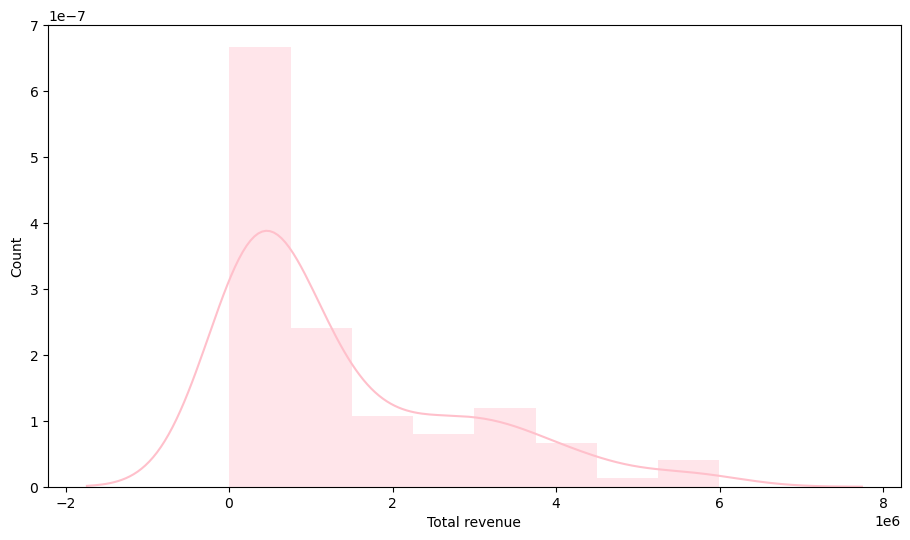

In [37]:
#Create dist plot for 'Total Revenue'
plt.figure(figsize = (11,6))

sns.distplot(amazon['Total Revenue'],color = 'pink')
plt.xlabel('Total revenue')
plt.ylabel('Count')
plt.show()

In [39]:
#Calculate the skewness of 'Total Revenue'
amazon['Total Revenue'].skew()

1.2776978228408213

Observation:
*In this observation of plot the data is not well distributed.the mean value is greater than median value so, the data was positively skewed and check the data is not symmetric.

In [5]:
#Calculate mean for "Total Cost"
amazon['Total Cost'].mean()

931805.6991000001

In [7]:
#Calculate median for "Total Cost"
amazon['Total Cost'].median()

363566.385

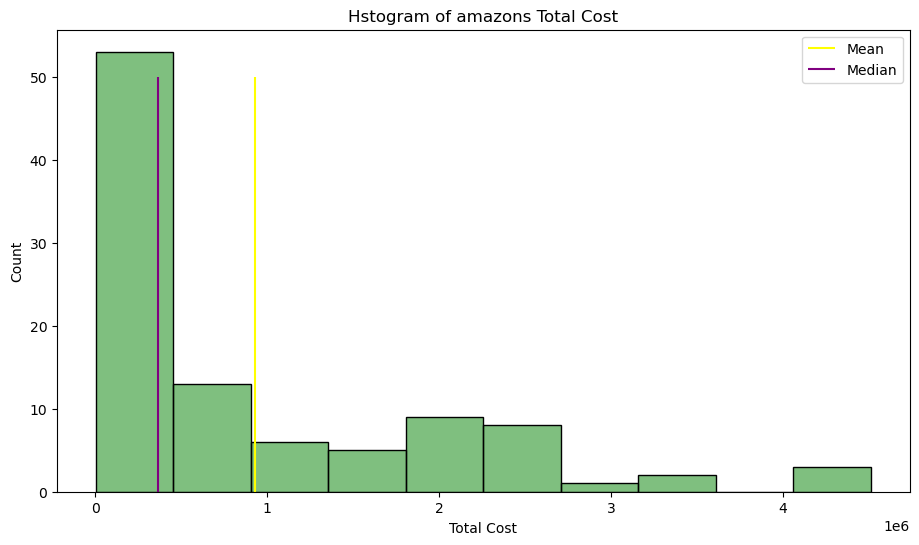

In [13]:
#Create a histogram for "Total Cost" feature and also include mean , median
plt.figure(figsize = (11,6))

sns.histplot(data = amazon,x='Total Cost',color = 'green',edgecolor = 'black',alpha = 0.5,bins = 10)
plt.title('Hstogram of amazons Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Count')
plt.vlines(amazon['Total Cost'].mean(),ymin=0,ymax=50,color = 'yellow',label='Mean')
plt.vlines(amazon['Total Cost'].median(),ymin=0,ymax=50,color = 'purple',label='Median')
plt.legend()
plt.show()

C:\Users\navan\AppData\Local\Temp\ipykernel_18148\404941900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amazon['Total Cost'],color = 'green')


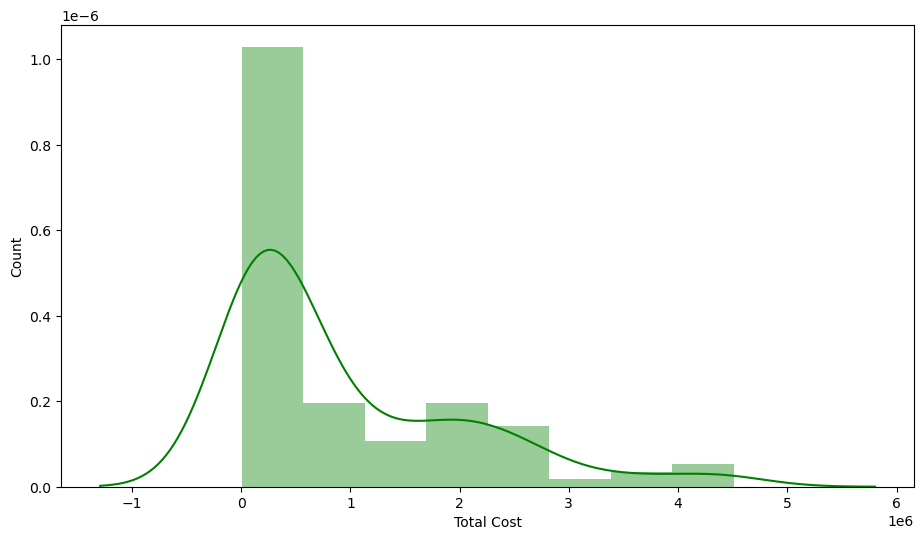

In [7]:
#Create dist plot for 'Total Cost'
plt.figure(figsize = (11,6))

sns.distplot(amazon['Total Cost'],color = 'green')
plt.xlabel('Total Cost')
plt.ylabel('Count')
plt.show()

In [9]:
#Calcule skewness for 'Total cost'
amazon['Total Cost'].skew()

1.4605118433178905

 Observation:
    In this "Total cost" column is not well distributed and mean value greater than median value known from this plot the 'Total Cost' column data is positively skewed.

In [15]:
#Calculate mean for 'Total Cost'
amazon['Total Revenue'].mean()

1373487.6831

In [17]:
#Calculate median for 'Total cost'
amazon['Total Revenue'].median()

752314.36

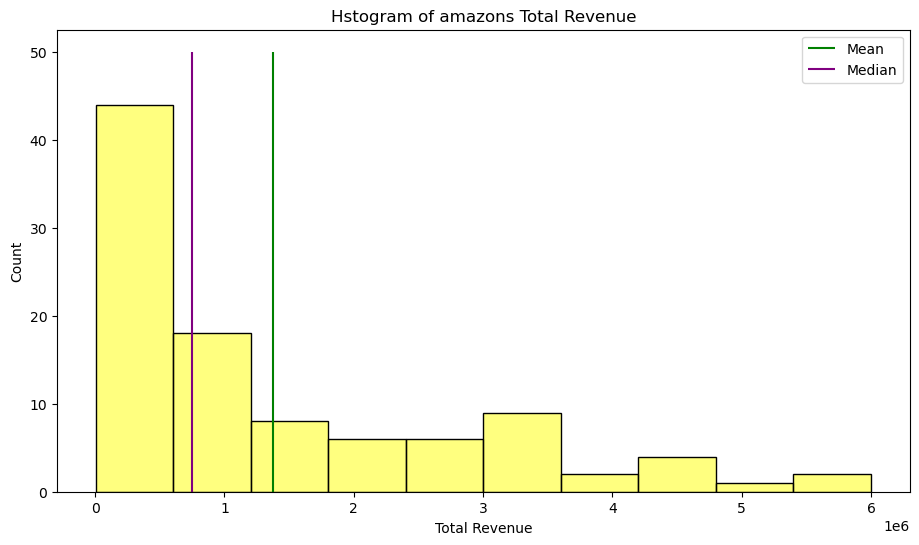

In [23]:
#Create histogram for 'Total Revenue' add into mean and median features
plt.figure(figsize = (11,6))

sns.histplot(data = amazon,x='Total Revenue',color = 'yellow',edgecolor = 'black',alpha = 0.5,bins = 10)
plt.title('Hstogram of amazons Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Count')
plt.vlines(amazon['Total Revenue'].mean(),ymin=0,ymax=50,color = 'green',label='Mean')
plt.vlines(amazon['Total Revenue'].median(),ymin=0,ymax=50,color = 'purple',label='Median')
plt.legend()
plt.show()

In [25]:
#Calculate skewness of 'Total Revenue'
amazon['Total Revenue'].skew()

1.2776978228408213

# Observation:
    *In this 'Total Revenue' column is not well distributed and mean value greater than median value known from this plot and the 'Total Revenue' column is positively skewed.
    *SKEWNESS: Some distribution of data,such as the bell curve or normal distribution,are symmetric.This means that the right and left of the distribution are perfect mirror images of one another. Not every distribution of data is symmetric.set of data that are not symmetric are said to be asymmetric.The measure of how asymetric a distribution can be is called skewness.
 
 1.s<0 means negatively skewed
 2.s>0 means postively skewed
 3.s=0 symmetric

# KEY METRICS AND FACTORS SHOWING MEANINGFUL RELATIONSHIP BETWEEN ATTRIBUTES

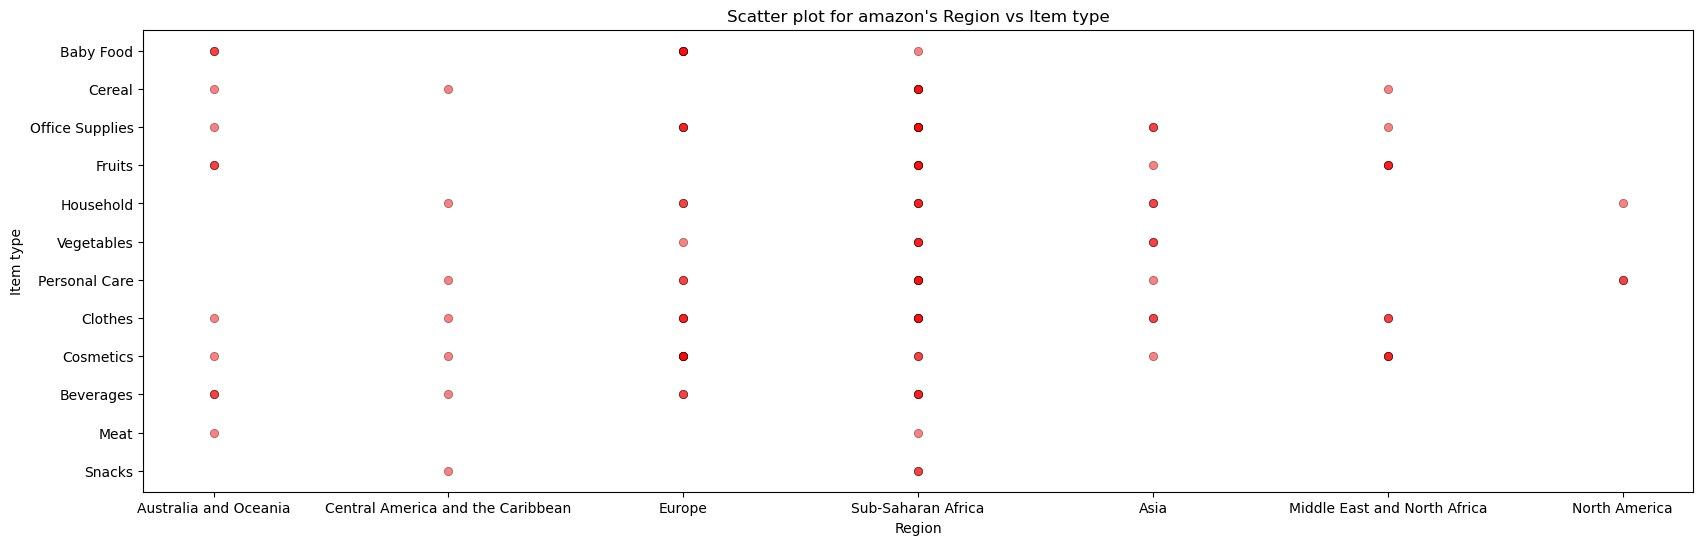

In [57]:
#Create scatter plot for amazon's 'Region' vs 'Item type'
plt.figure(figsize=(20,6))
sns.scatterplot(data = amazon,x = 'Region',y = 'Item Type',color='red',edgecolor='black',alpha=0.5)
plt.title("Scatter plot for amazon's Region vs Item type")
plt.xlabel("Region")
plt.ylabel("Item type")
plt.show()

In this plot sub-saharan africa region have highest sales in an all item type of products.

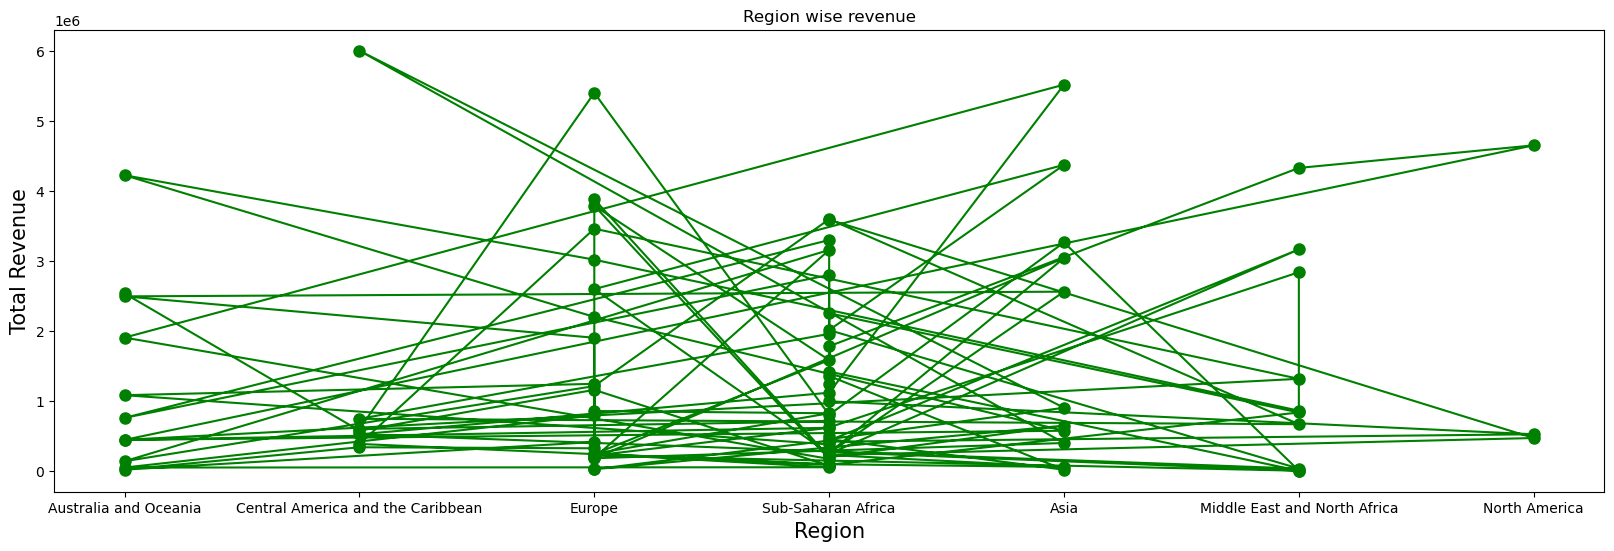

In [71]:
#Create line plot for 'Region' vs 'Total Revenue'
plt.figure(figsize = (20,6))
plt.plot(amazon['Region'],amazon['Total Revenue'],color = 'green',marker = 'o',linestyle = '-',markersize = 8)
plt.title('Region wise revenue')
plt.xlabel('Region',fontsize = 15)
plt.ylabel('Total Revenue',fontsize = 15)
plt.show()

In this plot explains region wise highest total revenue in this dataset and 'central america and the caribbean' region have highest total revenue.

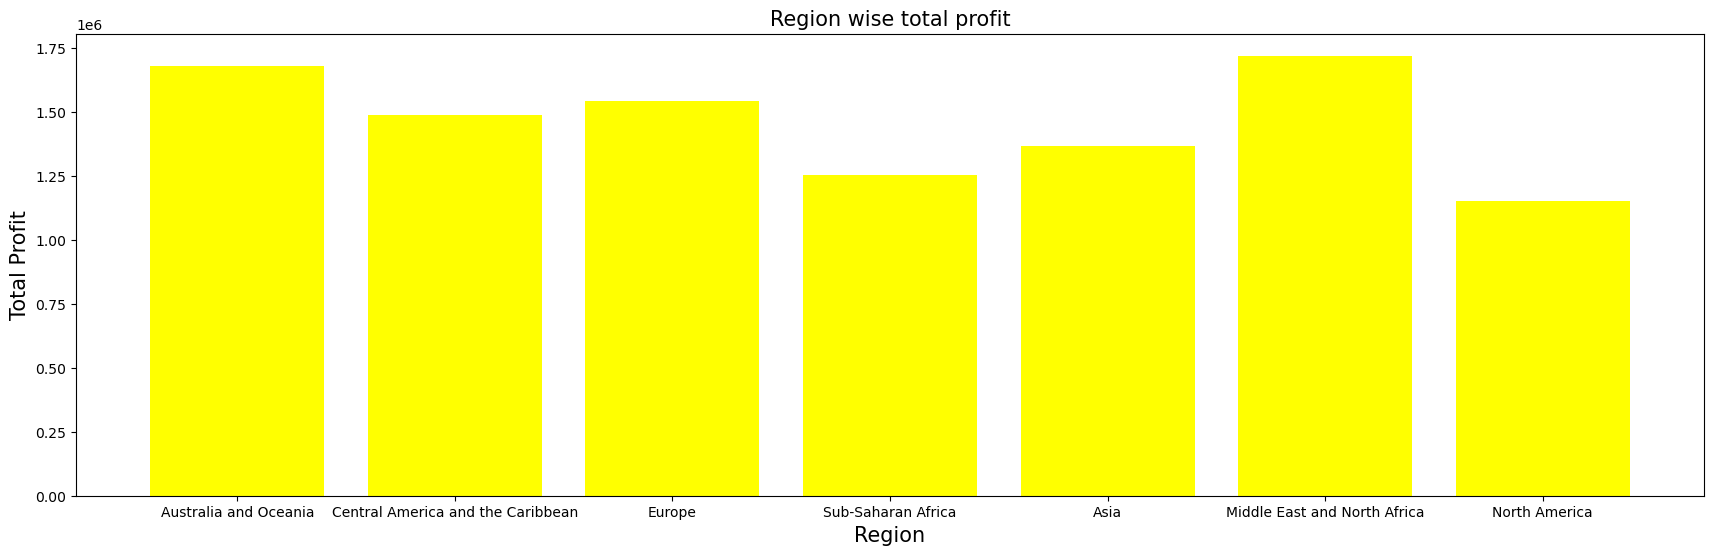

In [87]:
#Create bar plot for 'Region' vs 'Total profit'
plt.figure(figsize = (21,6))
x=amazon['Region']
y=amazon['Total Profit']
plt.bar(x,y,color = 'Yellow')
plt.title('Region wise total profit',fontsize = 15)
plt.xlabel('Region',fontsize = 15)
plt.ylabel('Total Profit',fontsize = 15)
plt.show()

This plot explains relation between 'Region' and 'Total Profit' also,central america and the caribbean have highest total revenue but 'Middle East and North Africa' contributed highest total profit.

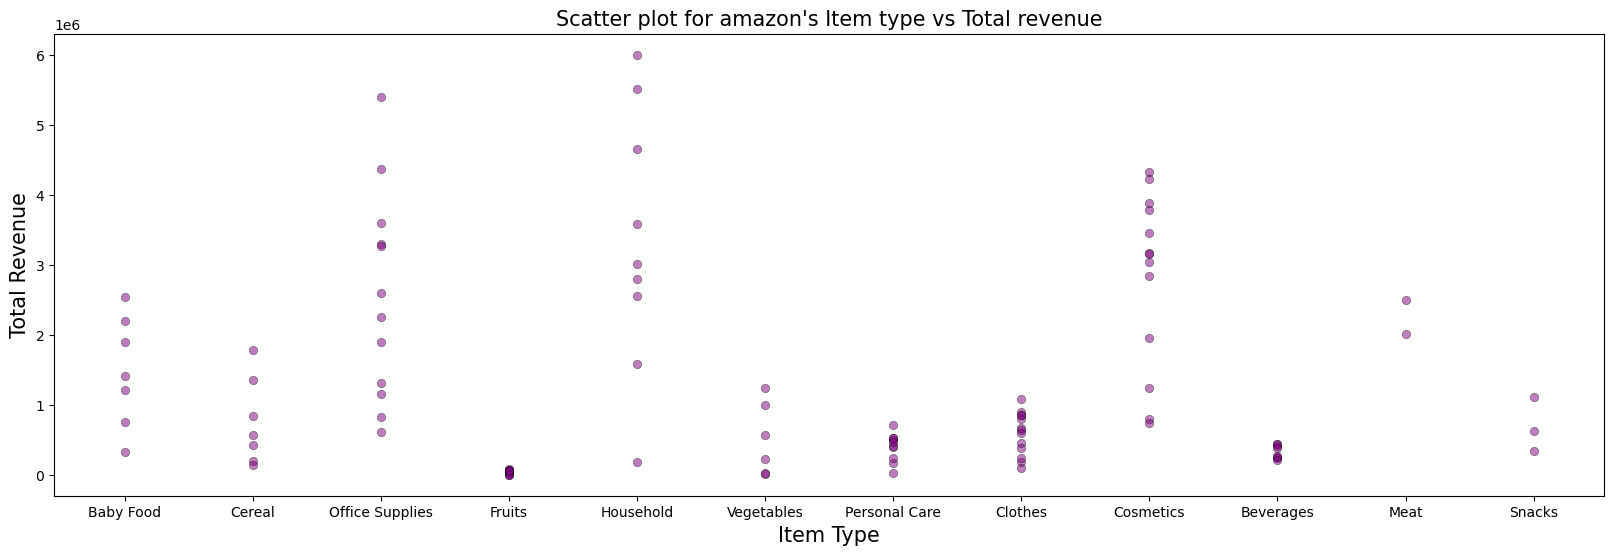

In [100]:
#Create scatterplot for amazon's 'Item Type' vs 'Total Revenue'
plt.figure(figsize=(20,6))
sns.scatterplot(data = amazon,x = 'Item Type',y = 'Total Revenue',color='purple',edgecolor='black',alpha=0.5)
plt.title("Scatter plot for amazon's Item type vs Total revenue",fontsize=15)
plt.xlabel("Item Type",fontsize=15)
plt.ylabel("Total Revenue",fontsize=15)
plt.show()

In this plot relationship between Item type and Total revenue also, i known from this plot 'Household' product has highest revenue from this dataset

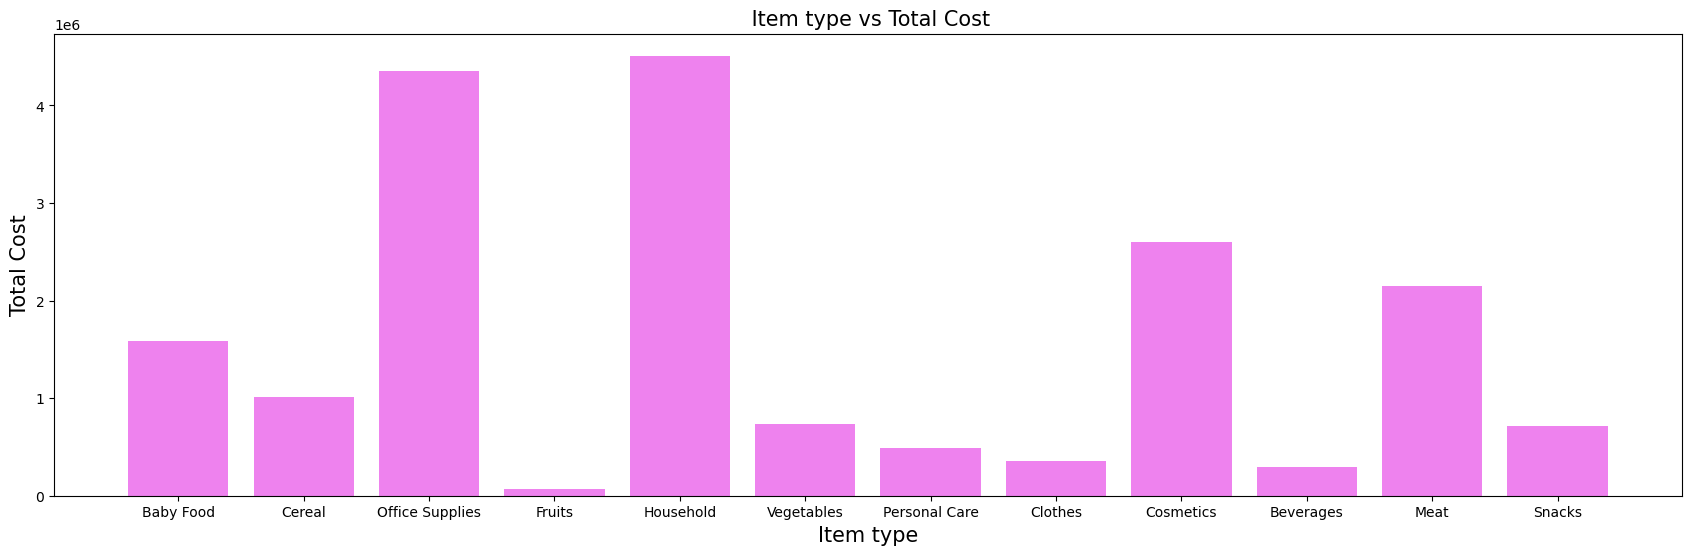

In [110]:
#Create bar plot for 'Region' vs 'Total profit'
plt.figure(figsize = (21,6))
x=amazon['Item Type']
y=amazon['Total Cost']
plt.bar(x,y,color = 'violet')
plt.title(' Item type vs Total Cost',fontsize = 15)
plt.xlabel('Item type',fontsize = 15)
plt.ylabel('Total Cost',fontsize = 15)
plt.show()

In this plot i compared Item type Total cost values and i learn from this plot amzon spending highest money on 'House hold' product to sell

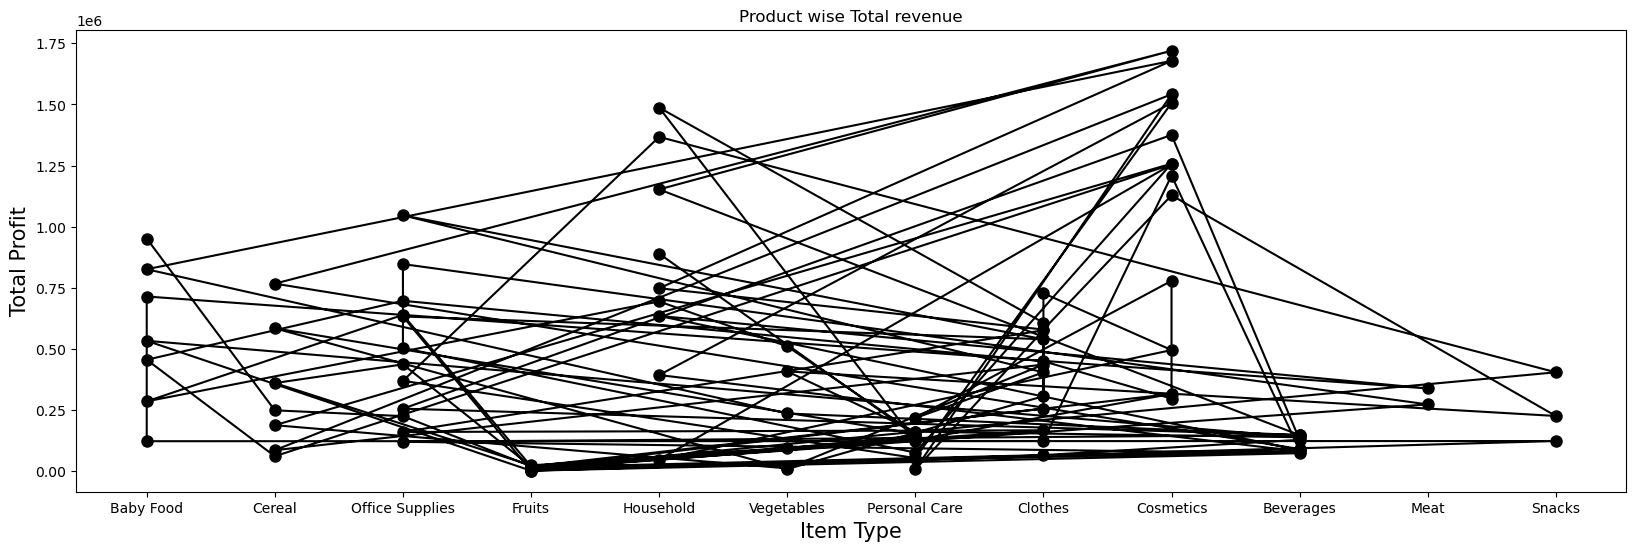

In [114]:
#Create line plot for 'Item Type' vs 'Total Profit'
plt.figure(figsize = (20,6))
plt.plot(amazon['Item Type'],amazon['Total Profit'],color = 'black',marker = 'o',linestyle = '-',markersize = 8)
plt.title('Product wise Total revenue')
plt.xlabel('Item Type',fontsize = 15)
plt.ylabel('Total Profit',fontsize = 15)
plt.show()

I learn from this line plot cosmetics contributed highest total profit while comparing Item type and Total profit.

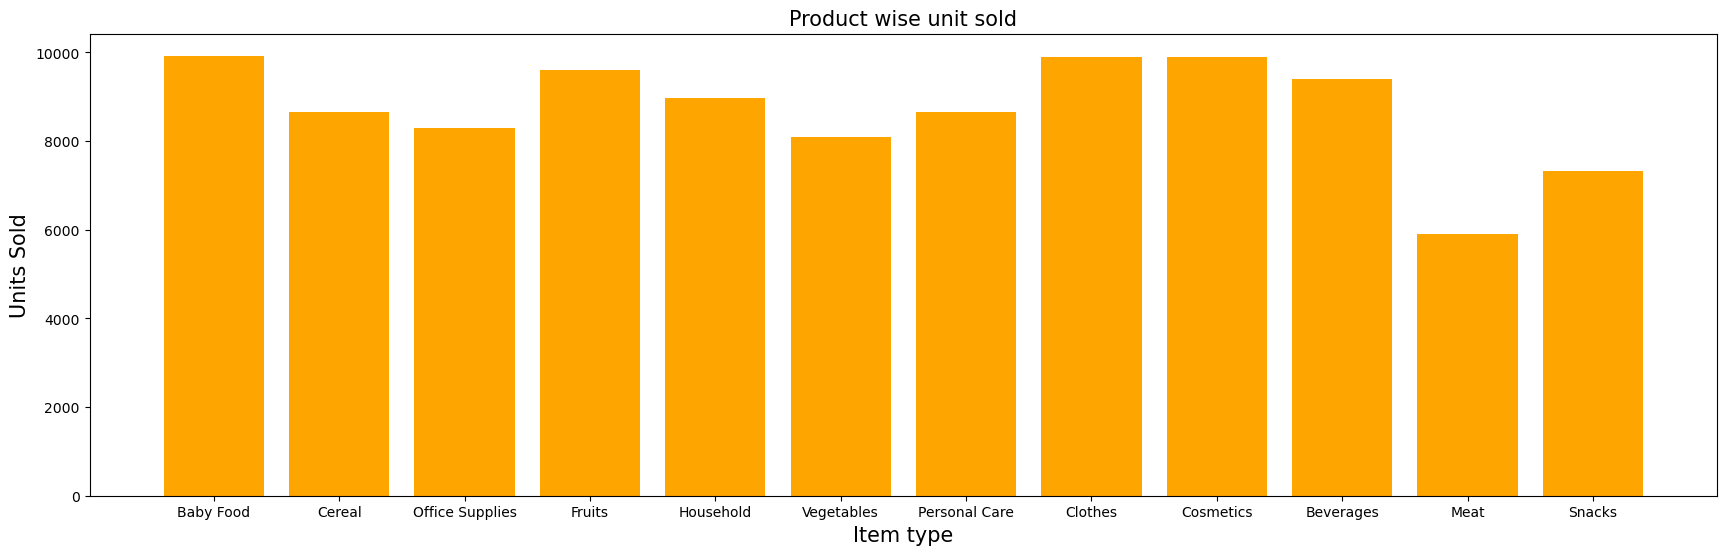

In [118]:
#Create bar plot for 'Item Type' vs 'Unit Sold'
plt.figure(figsize = (21,6))
x=amazon['Item Type']
y=amazon['Units Sold']
plt.bar(x,y,color = 'orange')
plt.title('Product wise unit sold',fontsize = 15)
plt.xlabel('Item type',fontsize = 15)
plt.ylabel('Units Sold',fontsize = 15)
plt.show()

I learn from this plot highest sold items in this 'Item Type' category is Baby Food.

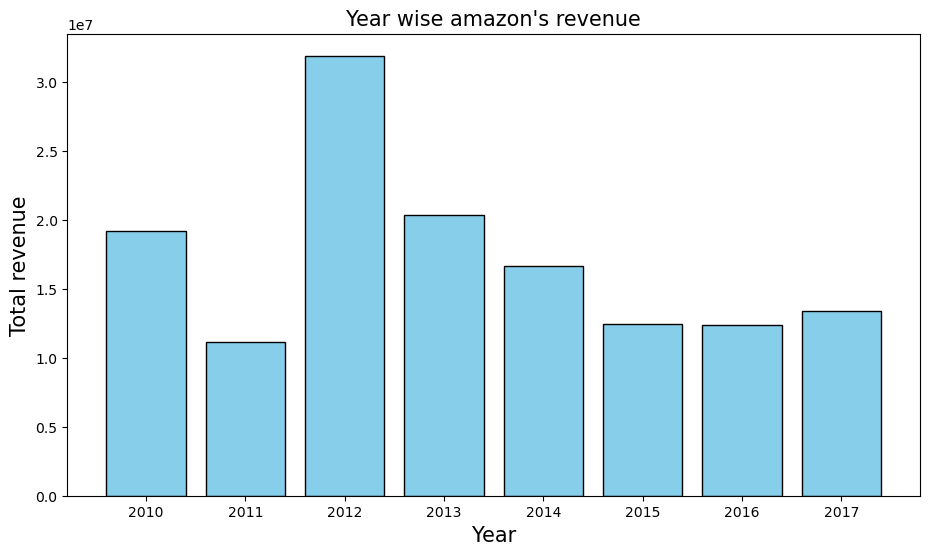

In [19]:
# Extract year from 'Order Date'
amazon['Year'] = pd.to_datetime(amazon['Order Date']).dt.year

# Group data by year and calculate total shipped quantities
grouped_data = amazon.groupby('Year')['Total Revenue'].sum()

#Create bar plot for year wise amazon's total revenue
plt.figure(figsize = (11,6))
plt.bar(grouped_data.index,grouped_data.values,color = 'skyblue',edgecolor = 'black')
plt.title("Year wise amazon's revenue",fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total revenue',fontsize = 15)
plt.show()

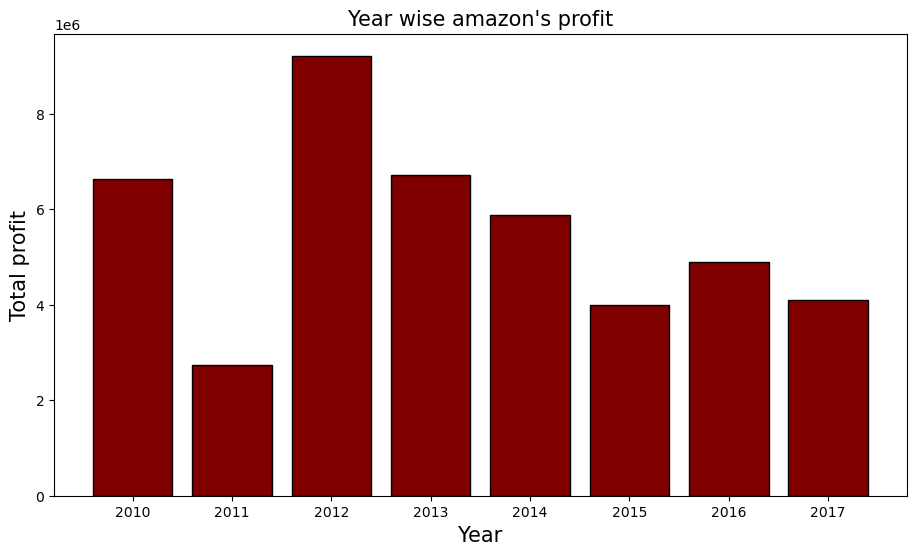

In [17]:
# Extract year from 'Order Date'
amazon['Year'] = pd.to_datetime(amazon['Order Date']).dt.year

# Group data by year and calculate total shipped quantities
grouped_data = amazon.groupby('Year')['Total Profit'].sum()

#Create bar plot for year wise amazon's profit
plt.figure(figsize = (11,6))
plt.bar(grouped_data.index,grouped_data.values,color = 'maroon',edgecolor = 'black')
plt.title("Year wise amazon's profit",fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total profit',fontsize = 15)
plt.show()

In this sales dataset between 2010 and 2017.I understand from last two charts 2012 year has highest revenue and highest profit year for amazon and least year was 2011

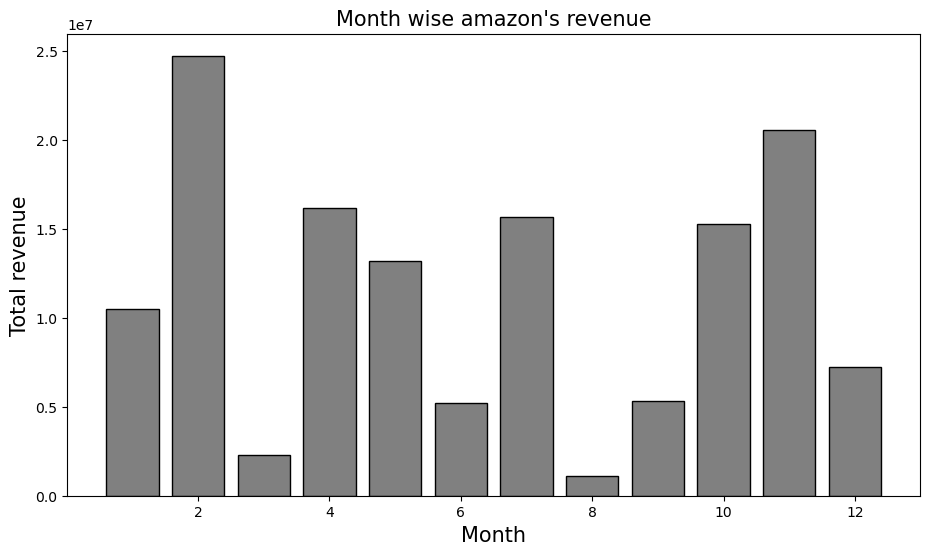

In [33]:
# Extract year from 'Order Date'
amazon['month'] = pd.to_datetime(amazon['Order Date']).dt.month

# Group data by year and calculate total shipped quantities
grouped_data = amazon.groupby('month')['Total Revenue'].sum()

#Create bar plot for month wise total revenue
plt.figure(figsize = (11,6))
plt.bar(grouped_data.index,grouped_data.values,color = 'grey',edgecolor = 'black')
plt.title("Month wise amazon's revenue",fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Total revenue',fontsize = 15)
plt.show()

In this plot i observed 'February' month generated highest revenue for amazon's sales in between 2010 to 2017 all years and least revenue month was august.

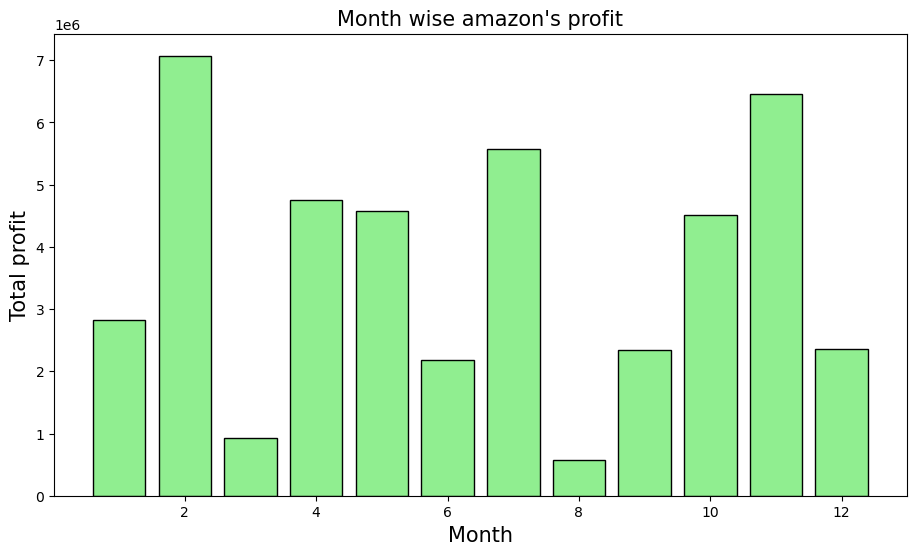

In [35]:
# Extract year from 'Order Date'
amazon['Year'] = pd.to_datetime(amazon['Order Date']).dt.month

# Group data by year and calculate total shipped quantities
grouped_data = amazon.groupby('Year')['Total Profit'].sum()

#Create bar plot for month wise amazon's profit
plt.figure(figsize = (11,6))
plt.bar(grouped_data.index,grouped_data.values,color = 'lightgreen',edgecolor = 'black')
plt.title("Month wise amazon's profit",fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.ylabel('Total profit',fontsize = 15)
plt.show()

In this plot i observed 'February' month generated highest profit for amazon's sales in between 2010 to 2017 all years and least month profit was august.

# Conclusion:
    In this analysis i observed subs-saharan african countries most purchased all products. america and the caribbean countries had highest revenue but middle east and north american countries have highest profit,amazon well performed in 2012 and every year february month it hits peaked.

# Solution:
    > Amazon well perfomed in 2012 but next years it not enter into 2012 level and every year only february month giving highest profit and revenue so, focus on the other months to give(eg:Function offers,country related functions,religious function).
    > Focus on north american countries
    >In item types house hold product consuming highest packaging cost and fruits are least sold so, focus on this problem. also highest sold items are house hold,office supplies products.